In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import xarray as xr
import xesmf as xe
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import copy
import pandas as pd

In [3]:
## Load LGM output
ddir = '/home/disk/atmos/vcooper/work/p2c2/lgm/'
dfile = 'lgmDA_hol_SST_monthly_climo.nc'
ncf = ddir + dfile
tempds = xr.open_dataset(ncf)
tempds = xr.merge([tempds.set_coords(['lat','lon','month']).sst,
                   tempds.set_coords(['lat','lon','month']).sst_std])
holo_sst_climo = tempds.assign_coords(month=('nmonth',np.arange(12)+1))
holo_sst_climo['mask'] = xr.where(~np.isnan(holo_sst_climo.sst.isel(nmonth=0)), 1, 0)

dfile = 'lgmDA_lgm_SST_monthly_climo.nc'
ncf = ddir + dfile
tempds = xr.open_dataset(ncf)
tempds = xr.merge([tempds.set_coords(['lat','lon','month']).sst,
                   tempds.set_coords(['lat','lon','month']).sst_std])
lgm_sst_climo = tempds.assign_coords(month=('nmonth',np.arange(12)+1))
lgm_sst_climo['mask'] = xr.where(~np.isnan(lgm_sst_climo.sst.isel(nmonth=0)), 1, 0)

## Load ICEFRAC
dfile = 'lgmDA_hol_ICEFRAC_monthly_climo.nc'
ncf = ddir + dfile
tempds = xr.open_dataset(ncf)
tempds = xr.merge([tempds.set_coords(['lat','lon','month']).icefrac,
                   tempds.set_coords(['lat','lon','month']).icefrac_std])
holo_ice_climo = tempds.assign_coords(month=('nmonth',np.arange(12)+1))
holo_ice_climo['mask'] = xr.where(~np.isnan(holo_ice_climo.icefrac.isel(nmonth=0)), 1, 0)

dfile = 'lgmDA_lgm_ICEFRAC_monthly_climo.nc'
ncf = ddir + dfile
tempds = xr.open_dataset(ncf)
tempds = xr.merge([tempds.set_coords(['lat','lon','month']).icefrac,
                   tempds.set_coords(['lat','lon','month']).icefrac_std])
lgm_ice_climo = tempds.assign_coords(month=('nmonth',np.arange(12)+1))
lgm_ice_climo['mask'] = xr.where(~np.isnan(lgm_ice_climo.icefrac.isel(nmonth=0)), 1, 0)

## load infilled product
path = '/home/disk/sipn/vcooper/nobackup/lgm/infilled/'
lgm_sst_merged = xr.open_dataset(path + 
                                     'lgmDA_lgm_SST_monthly_climo_merged.nc')

lgm_ice_merged = xr.open_dataset(path + 'lgmDA_lgm_ICEFRAC_monthly_climo_merged_v2.nc').set_coords(['lat','lon'])

In [10]:
## load modern day AMIP SSTs and SIC
path = '/home/disk/sipn/vcooper/nobackup/lgm/cam_sst/'
amip2000 = xr.open_dataset(path + 'sst_HadOIBl_bc_1.9x2.5_clim_c061031.nc',decode_times=False)
# amip2000 = xr.open_dataset(path + 'sst_HadOIBl_bc_0.9x1.25_clim_c040926.nc',decode_times=False)

In [9]:
## check from Philip
print("original")
for month in lgm_ice_climo.icefrac:
    print("Max: {}, Min: {}".format(month.max().data, month.min().data))
    
print("\n infilled")
for month in lgm_ice_merged.icefrac:
    print("Max: {}, Min: {}".format(month.max().data, month.min().data))

print("\n amip2000")
for time in amip2000.ice_cov:
    print("Max: {}, Min: {}".format(month.max().data, month.min().data))

original
Max: 1.0, Min: 1.1627657055557247e-31
Max: 1.0, Min: 6.265230382275583e-32
Max: 1.0, Min: 7.554862817943178e-32
Max: 1.0, Min: 1.2056254635819079e-31
Max: 1.0, Min: 1.2080560514278482e-31
Max: 1.0, Min: 1.2173106416403356e-31
Max: 1.0, Min: 1.2254246820099451e-31
Max: 1.0, Min: 1.2236331200374872e-31
Max: 1.0, Min: 1.209813978609694e-31
Max: 1.0, Min: 1.2059291821236086e-31
Max: 1.0, Min: 1.2066902960337707e-31
Max: 1.0, Min: 1.2056887347771798e-31

 infilled
Max: 1.0, Min: 0.0
Max: 1.0, Min: 0.0
Max: 1.0, Min: 0.0
Max: 1.0, Min: 0.0
Max: 1.0, Min: 0.0
Max: 1.0, Min: 0.0
Max: 1.0, Min: 0.0
Max: 1.0, Min: 0.0
Max: 1.0, Min: 0.0
Max: 1.0, Min: 0.0
Max: 1.0, Min: 0.0
Max: 1.0, Min: 0.0

 amip2000
Max: 1.0, Min: 0.0
Max: 1.0, Min: 0.0
Max: 1.0, Min: 0.0
Max: 1.0, Min: 0.0
Max: 1.0, Min: 0.0
Max: 1.0, Min: 0.0
Max: 1.0, Min: 0.0
Max: 1.0, Min: 0.0
Max: 1.0, Min: 0.0
Max: 1.0, Min: 0.0
Max: 1.0, Min: 0.0
Max: 1.0, Min: 0.0


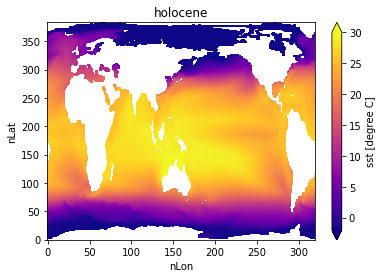

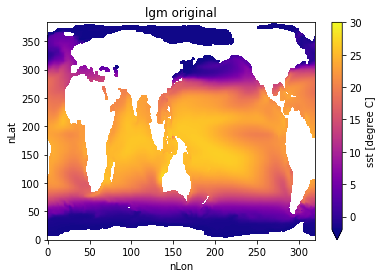

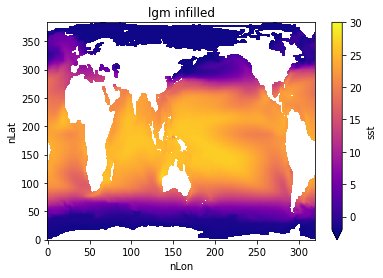

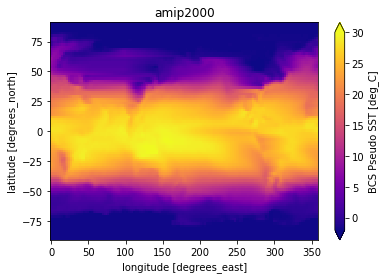

In [12]:
## quick look at various grids
holo_sst_climo.sst[0].plot(cmap='plasma',vmin=-2,vmax=30)
plt.title('holocene')
plt.show()
lgm_sst_climo.sst[0].plot(cmap='plasma',vmin=-2,vmax=30)
plt.title('lgm original')
plt.show()
lgm_sst_merged.sst[0].plot(cmap='plasma',vmin=-2,vmax=30)
plt.title('lgm infilled')
plt.show()

amip2000.SST_cpl[0].plot(cmap='plasma',vmin=-2,vmax=30)
plt.title('amip2000')
plt.show()

In [13]:
## calculate anomaly of LGM - Late Holo
lgm_sst_anom = lgm_sst_merged.sst - holo_sst_climo.sst.values
lgm_ice_anom = lgm_ice_merged.icefrac - holo_ice_climo.icefrac.values

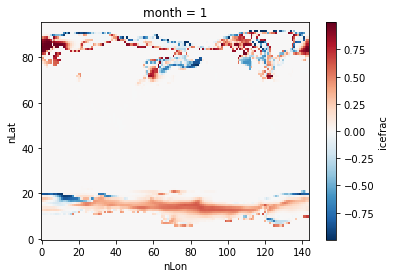

In [14]:
for i in range(12):
    lgm_ice_anom[i].plot()
    plt.show()
    break ## temporary, only show 1 month

## regrid anomaly onto amip2000 grid

In [15]:
%%time
## SST (icefrac is already on 1.9x2.5 grid)
amip2000['mask'] = xr.where(~np.isnan(amip2000.SST_cpl[0]),1,0) ## dummy mask
newgrid = amip2000 # desired grid
data_for_regridding = lgm_sst_anom.to_dataset()
data_for_regridding['mask'] = xr.where(~np.isnan(data_for_regridding.sst[0]),1,0)

regridder = xe.Regridder(data_for_regridding, newgrid,
                         method='bilinear',
                         periodic=True,extrap_num_src_pnts=64,
                         extrap_method='inverse_dist',
#                          filename='bilinear_lgm_to_holo_per_extrapID64.nc',
                         reuse_weights=False)

lgm_sst_anom_amipgrid = regridder(lgm_sst_anom)

regridder

/home/disk/atmos/vcooper/miniconda3/envs/beauchard/lib/python3.7/site-packages/xesmf/backend.py:53: UserWarning: Latitude is outside of [-90, 90]
  warnings.warn('Latitude is outside of [-90, 90]')


CPU times: user 7.78 s, sys: 246 ms, total: 8.03 s
Wall time: 25.5 s


/home/disk/atmos/vcooper/miniconda3/envs/beauchard/lib/python3.7/site-packages/xesmf/frontend.py:534: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs,


xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            bilinear_384x320_96x144_peri.nc 
Reuse pre-computed weights? False 
Input grid shape:           (384, 320) 
Output grid shape:          (96, 144) 
Periodic in longitude?      True

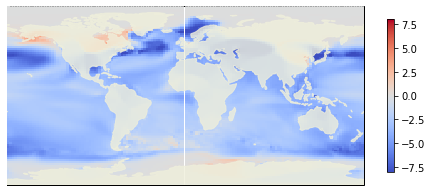

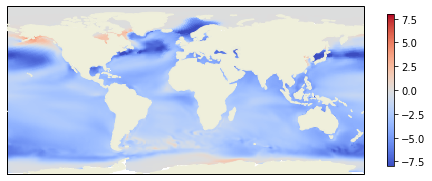

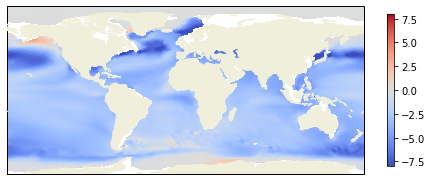

In [16]:
## plot anomalies to spot check sst
## infilled, regridded to ampi2000 (now has values over land)
plt.figure(figsize=(8,4))
ax = plt.subplot(projection=ccrs.PlateCarree())
plt.pcolormesh(lgm_sst_anom_amipgrid.lon,lgm_sst_anom_amipgrid.lat,
               lgm_sst_anom_amipgrid[0],cmap='coolwarm',vmin=-8,vmax=8,
               transform=ccrs.PlateCarree(),zorder=3)
ax.add_feature(cfeature.LAND,zorder=5,alpha=0.8)
plt.colorbar(shrink=0.7)
plt.show()

## infilled, before regridding
plt.figure(figsize=(8,4))
ax = plt.subplot(projection=ccrs.PlateCarree())
plt.pcolormesh(lgm_sst_anom.lon,lgm_sst_anom.lat,
               lgm_sst_anom[0],cmap='coolwarm',vmin=-8,vmax=8,
               transform=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND,zorder=5,alpha=0.99)
plt.colorbar(shrink=0.7)
plt.show()

## original anomaly from Jess
plt.figure(figsize=(8,4))
ax = plt.subplot(projection=ccrs.PlateCarree())
plt.pcolormesh(lgm_sst_anom.lon,lgm_sst_anom.lat,
               lgm_sst_climo.sst[0] - holo_sst_climo.sst[0],cmap='coolwarm',vmin=-8,vmax=8,
               transform=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND,zorder=5,alpha=0.99)
plt.colorbar(shrink=0.7)
plt.show()

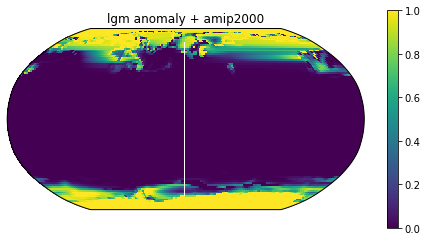

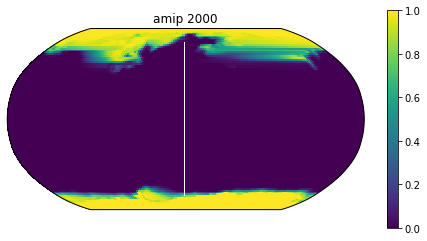

In [20]:
## dummy plots to check icefrac too, although no changes made
plt.figure(figsize=(8,4))
ax = plt.subplot(projection=ccrs.Robinson())
plt.pcolormesh(lgm_ice_anom.lon,lgm_ice_anom.lat,
               (lgm_ice_anom.values + amip2000.ice_cov_prediddle)[3],cmap='viridis',vmin=0,vmax=1,
               transform=ccrs.PlateCarree())
plt.colorbar()
plt.title('lgm anomaly + amip2000')
# ax.add_feature(cfeature.LAND,zorder=6)
plt.show()

plt.figure(figsize=(8,4))
ax = plt.subplot(projection=ccrs.Robinson())
plt.pcolormesh(lgm_ice_anom.lon,lgm_ice_anom.lat,
               amip2000.ice_cov_prediddle[3],cmap='viridis',
               transform=ccrs.PlateCarree())
plt.colorbar()
plt.title('amip 2000')
# ax.add_feature(cfeature.LAND,zorder=6)
plt.show()

## create merged dataset and preprocess

In [21]:
lgm_sst_bc_prediddle = lgm_sst_anom_amipgrid.values + amip2000.SST_cpl_prediddle
lgm_ice_bc_prediddle = lgm_ice_anom.values + amip2000.ice_cov_prediddle

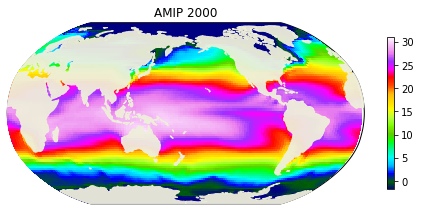

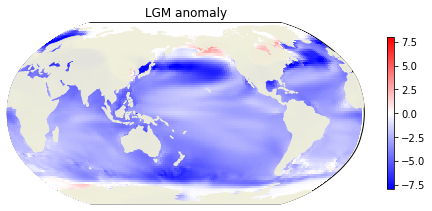

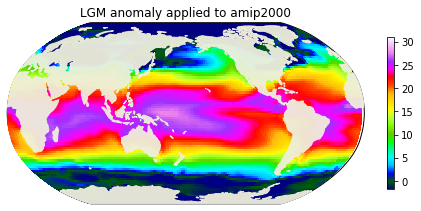

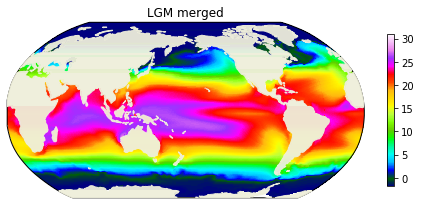

In [22]:
## AMIP
plt.figure(figsize=(8,4))
ax = plt.subplot(projection=ccrs.Robinson(central_longitude=-180))
plt.pcolormesh(amip2000.lon,amip2000.lat,
               amip2000.SST_cpl_prediddle[0],cmap='gist_ncar',vmin=-1.8,vmax=31,
               transform=ccrs.PlateCarree(),zorder=3)
ax.add_feature(cfeature.LAND,zorder=5,alpha=0.95)
plt.title('AMIP 2000')
plt.colorbar(shrink=0.7)
plt.show()

## anom
plt.figure(figsize=(8,4))
ax = plt.subplot(projection=ccrs.Robinson(central_longitude=-180))
plt.pcolormesh(lgm_sst_anom_amipgrid.lon,lgm_sst_anom_amipgrid.lat,
               lgm_sst_anom_amipgrid[0],cmap='bwr',vmin=-8,vmax=8,
               transform=ccrs.PlateCarree(),zorder=3)
ax.add_feature(cfeature.LAND,zorder=5,alpha=0.95)
plt.title('LGM anomaly')
plt.colorbar(shrink=0.7)
plt.show()

## resulting anomaly
plt.figure(figsize=(8,4))
ax = plt.subplot(projection=ccrs.Robinson(central_longitude=-180))
plt.pcolormesh(lgm_sst_anom_amipgrid.lon,lgm_sst_anom_amipgrid.lat,
               lgm_sst_bc_prediddle[0],cmap='gist_ncar',vmin=-1.8,vmax=31,
               transform=ccrs.PlateCarree(),zorder=3)
ax.add_feature(cfeature.LAND,zorder=5,alpha=0.95)
plt.title('LGM anomaly applied to amip2000')
plt.colorbar(shrink=0.7)
plt.show()

## infilled reference
plt.figure(figsize=(8,4))
ax = plt.subplot(projection=ccrs.Robinson(central_longitude=-180))
plt.pcolormesh(lgm_sst_merged.lon,lgm_sst_merged.lat,
               lgm_sst_merged.sst[0],cmap='gist_ncar',vmin=-1.8,vmax=31,
               transform=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND,zorder=5,alpha=0.95)
plt.colorbar(shrink=0.7)
plt.title('LGM merged')
plt.show()

In [23]:
## corrections for data consistency from:
## /glade/work/vcooper/p2c2/ydong_camsst/create_SST_files_from_B_case_with_bcgen.ncl

# 1) If SST < -1.8 or ice frac >= 90%, SST = -1.8
# SST = where(SST.le.-1.8, -1.8, SST)
# SST = where(SEAICE.gt.90., -1.8, SST)

lgm_sst_bc_prediddle_adj = xr.where(lgm_sst_bc_prediddle < -1.8, 
                                    -1.8, lgm_sst_bc_prediddle)
lgm_sst_bc_prediddle_adj = xr.where(lgm_ice_bc_prediddle > 0.9, 
                                    -1.8, lgm_sst_bc_prediddle_adj)

# ; 2) min ice frac is 0%, max ice_frac is 100%
# SEAICE = where(SEAICE.lt.0., 0., SEAICE)
# SEAICE = where(SEAICE.gt.100., 100., SEAICE)
lgm_ice_bc_prediddle_adj = xr.where(lgm_ice_bc_prediddle < 0, 
                                    0, lgm_ice_bc_prediddle)
lgm_ice_bc_prediddle_adj = xr.where(lgm_ice_bc_prediddle_adj > 1, 
                                    1, lgm_ice_bc_prediddle_adj)

# ; 3) Hurrell et al correction to SST (if 0.15 < ice frac < 0.9)
# SST_max = 9.328*(0.729-(SEAICE/100.)^3)-1.8
# SST = where((SEAICE.gt.15.).and.(SEAICE.lt.90.).and.(SST.gt.SST_max), SST_max, SST)
SST_max = 9.328*(0.729-(lgm_ice_bc_prediddle_adj)**3)-1.8
lgm_sst_bc_prediddle_adj = xr.where((lgm_ice_bc_prediddle_adj > 0.15) & 
                                    (lgm_ice_bc_prediddle_adj < 0.90) &
                                    (lgm_sst_bc_prediddle_adj > SST_max), 
                                     SST_max, lgm_sst_bc_prediddle_adj)

# ; 4) No sea ice if SST > 4.97
# SEAICE = where(SST.gt.4.97, 0., SEAICE)
lgm_ice_bc_prediddle_adj = xr.where(lgm_sst_bc_prediddle_adj > 4.97, 
                                    0, lgm_ice_bc_prediddle_adj)

# ; 5) Hurrell et al correction to ice frac (if -1.8 < SST < 4.97)
# ice_max = 100.*(0.729-(SST+1.8)/9.328)^(1./3.)
# SEAICE = where((SST.gt.-1.8).and.(SST.lt.4.97).and.(SEAICE.gt.ice_max), ice_max, SEAICE)
ice_max = (0.729-(lgm_sst_bc_prediddle_adj+1.8)/9.328)**(1./3.)
lgm_ice_bc_prediddle_adj = xr.where((lgm_sst_bc_prediddle_adj > -1.8) & 
                                    (lgm_sst_bc_prediddle_adj < 4.97) & 
                                    (lgm_ice_bc_prediddle_adj > ice_max), 
                                     ice_max, lgm_ice_bc_prediddle_adj)

# print((/"Filling in missing values in SST and SEAICE..."/))
# poisson_grid_fill(SST, True, 1, 500, 0.01, 0.6, 0)
# poisson_grid_fill(SEAICE, True, 1, 500, 0.01, 0.6, 0)
##  VTC: don't need this step because already extrapolated
##       but should check whether these land values are actually used?

In [43]:
m_isel = 6

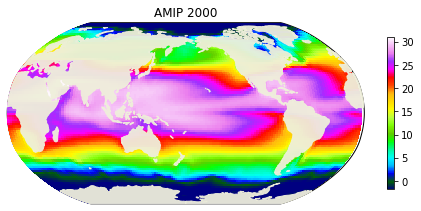

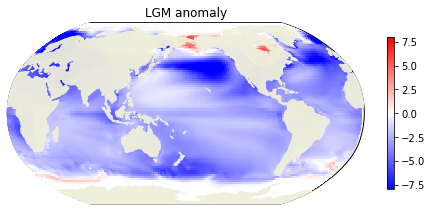

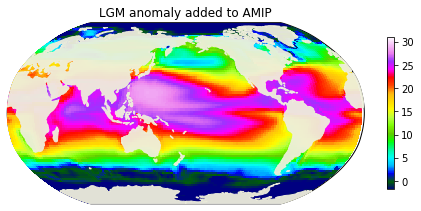

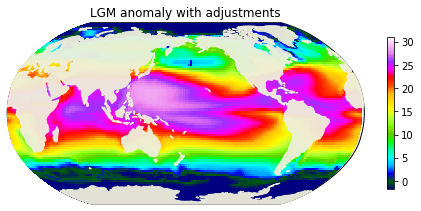

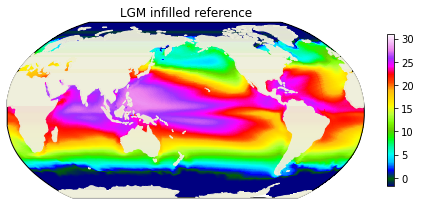

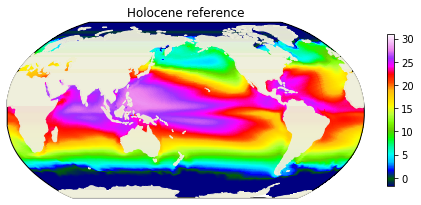

In [46]:
## AMIP
plt.figure(figsize=(8,4))
ax = plt.subplot(projection=ccrs.Robinson(central_longitude=-180))
plt.pcolormesh(amip2000.lon,amip2000.lat,
               amip2000.SST_cpl_prediddle[m_isel],cmap='gist_ncar',vmin=-1.8,vmax=31,
               transform=ccrs.PlateCarree(),zorder=3)
ax.add_feature(cfeature.LAND,zorder=5,alpha=0.95)
plt.title('AMIP 2000')
plt.colorbar(shrink=0.7)
plt.show()

## anom
plt.figure(figsize=(8,4))
ax = plt.subplot(projection=ccrs.Robinson(central_longitude=-180))
plt.pcolormesh(lgm_sst_anom_amipgrid.lon,lgm_sst_anom_amipgrid.lat,
               lgm_sst_anom_amipgrid[m_isel],cmap='bwr',vmin=-8,vmax=8,
               transform=ccrs.PlateCarree(),zorder=3)
ax.add_feature(cfeature.LAND,zorder=5,alpha=0.95)
plt.title('LGM anomaly')
plt.colorbar(shrink=0.7)
plt.show()

## resulting anomaly
plt.figure(figsize=(8,4))
ax = plt.subplot(projection=ccrs.Robinson(central_longitude=-180))
plt.pcolormesh(lgm_sst_anom_amipgrid.lon,lgm_sst_anom_amipgrid.lat,
               lgm_sst_bc_prediddle[m_isel],cmap='gist_ncar',vmin=-1.8,vmax=31,
               transform=ccrs.PlateCarree(),zorder=3)
ax.add_feature(cfeature.LAND,zorder=5,alpha=0.95)
plt.title('LGM anomaly added to AMIP')
plt.colorbar(shrink=0.7)
plt.show()

## resulting anomaly
plt.figure(figsize=(8,4))
ax = plt.subplot(projection=ccrs.Robinson(central_longitude=-180))
plt.pcolormesh(lgm_sst_anom_amipgrid.lon,lgm_sst_anom_amipgrid.lat,
               lgm_sst_bc_prediddle_adj[m_isel],cmap='gist_ncar',vmin=-1.8,vmax=31,
               transform=ccrs.PlateCarree(),zorder=3)
ax.add_feature(cfeature.LAND,zorder=5,alpha=0.95)
plt.title('LGM anomaly with adjustments')
plt.colorbar(shrink=0.7)
plt.show()

## infilled reference
plt.figure(figsize=(8,4))
ax = plt.subplot(projection=ccrs.Robinson(central_longitude=-180))
plt.pcolormesh(lgm_sst_merged.lon,lgm_sst_merged.lat,
               lgm_sst_merged.sst[m_isel],cmap='gist_ncar',vmin=-1.8,vmax=31,
               transform=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND,zorder=5,alpha=0.95)
plt.colorbar(shrink=0.7)
plt.title('LGM infilled reference')
plt.show()

## holocene reference
plt.figure(figsize=(8,4))
ax = plt.subplot(projection=ccrs.Robinson(central_longitude=-180))
plt.pcolormesh(lgm_sst_merged.lon,lgm_sst_merged.lat,
               lgm_sst_merged.sst[m_isel],cmap='gist_ncar',vmin=-1.8,vmax=31,
               transform=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND,zorder=5,alpha=0.95)
plt.colorbar(shrink=0.7)
plt.title('Holocene reference')
plt.show()

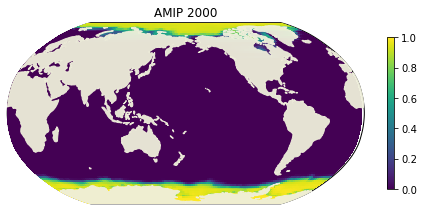

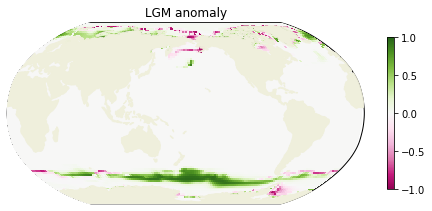

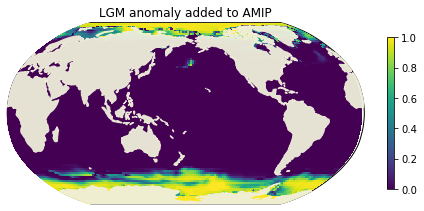

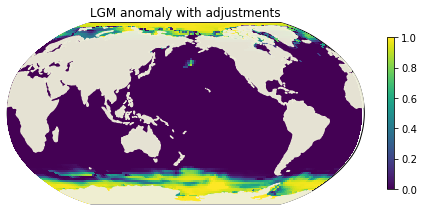

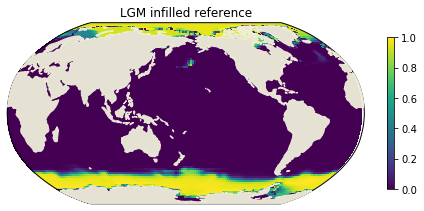

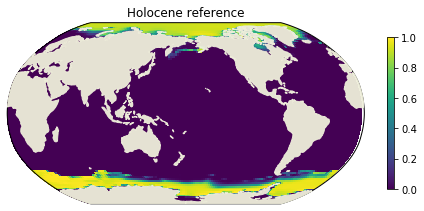

In [45]:
## AMIP
plt.figure(figsize=(8,4))
ax = plt.subplot(projection=ccrs.Robinson(central_longitude=-180))
plt.pcolormesh(amip2000.lon,amip2000.lat,
               amip2000.ice_cov_prediddle[m_isel],cmap='viridis',vmin=0,vmax=1,
               transform=ccrs.PlateCarree(),zorder=3)
ax.add_feature(cfeature.LAND,zorder=5,alpha=0.95)
plt.title('AMIP 2000')
plt.colorbar(shrink=0.7)
plt.show()

## anom
plt.figure(figsize=(8,4))
ax = plt.subplot(projection=ccrs.Robinson(central_longitude=-180))
plt.pcolormesh(lgm_ice_anom.lon,lgm_ice_anom.lat,
               lgm_ice_anom[m_isel],cmap='PiYG',vmin=-1,vmax=1,
               transform=ccrs.PlateCarree(),zorder=3)
ax.add_feature(cfeature.LAND,zorder=5,alpha=0.95)
plt.title('LGM anomaly')
plt.colorbar(shrink=0.7)
plt.show()

## resulting anomaly
plt.figure(figsize=(8,4))
ax = plt.subplot(projection=ccrs.Robinson(central_longitude=-180))
plt.pcolormesh(lgm_ice_anom.lon,lgm_ice_anom.lat,
               lgm_ice_bc_prediddle[m_isel],cmap='viridis',vmin=0,vmax=1,
               transform=ccrs.PlateCarree(),zorder=3)
ax.add_feature(cfeature.LAND,zorder=5,alpha=0.95)
plt.title('LGM anomaly added to AMIP')
plt.colorbar(shrink=0.7)
plt.show()

## resulting anomaly
plt.figure(figsize=(8,4))
ax = plt.subplot(projection=ccrs.Robinson(central_longitude=-180))
plt.pcolormesh(lgm_ice_anom.lon,lgm_ice_anom.lat,
               lgm_ice_bc_prediddle_adj[m_isel],cmap='viridis',vmin=0,vmax=1,
               transform=ccrs.PlateCarree(),zorder=3)
ax.add_feature(cfeature.LAND,zorder=5,alpha=0.95)
plt.title('LGM anomaly with adjustments')
plt.colorbar(shrink=0.7)
plt.show()

## infilled reference
plt.figure(figsize=(8,4))
ax = plt.subplot(projection=ccrs.Robinson(central_longitude=-180))
plt.pcolormesh(lgm_ice_merged.lon,lgm_ice_merged.lat,
               lgm_ice_merged.icefrac[m_isel],cmap='viridis',vmin=0,vmax=1,
               transform=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND,zorder=5,alpha=0.95)
plt.colorbar(shrink=0.7)
plt.title('LGM infilled reference')
plt.show()

## infilled reference
plt.figure(figsize=(8,4))
ax = plt.subplot(projection=ccrs.Robinson(central_longitude=-180))
plt.pcolormesh(lgm_ice_merged.lon,lgm_ice_merged.lat,
               holo_ice_climo.icefrac[m_isel],cmap='viridis',vmin=0,vmax=1,
               transform=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND,zorder=5,alpha=0.95)
plt.colorbar(shrink=0.7)
plt.title('Holocene reference')
plt.show()